In [65]:
# Getting the post reader
from post_parser_record import PostParserRecord
post_reader = PostParserRecord("Posts_Coffee.xml")

In [66]:
word_dict = {}
word_set = {}
word_set = set()

for question_id in post_reader.map_questions:
  
  doc_set = set()
  question = post_reader.map_questions[question_id]
  question_b = question.body.lower().split()
  question_t = question.title.lower().split() # Combines question body and title
  question_bt = question_b + question_t
 
  for token in question_bt:
    word_set.add(token)
    
    if token in word_dict:
      doc_set = word_dict[token]
      doc_set.add(question_id)
      word_dict.update({token: doc_set})
    else:
      doc_set = {question_id}
      word_dict.update({token: doc_set})
      

for answer_id in post_reader.map_just_answers:
 
  doc_set = set()
  answer = post_reader.map_just_answers[answer_id]
  answer_text = answer.body.lower().split()
  

  for token in answer_text:
    word_set.add(token)
    
    if token in word_dict:
      doc_set = word_dict[token]
      doc_set.add(answer_id)
      word_dict.update({token: doc_set})
    else:
      doc_set = {answer_id}
      word_dict.update({token: doc_set})


In [67]:
def intersect(list1, list2):
  list1 = list(list1)
  list2 = list(list2)
  matches = []
  i = 0
  j = 0
  while i < len(list1) and j < len(list2):
      if list1[i] < list2[j]:
          i += 1
      elif list2[j] < list1[i]:
          j+= 1
      else:
          matches.append(list2[j])
          j += 1
          i += 1
  
  return sorted(matches)

In [68]:
def union(list1, list2):
  list1 = list(list1)
  list2 = list(list2)
  matches = []
  i = 0
  j = 0
  while i < len(list1) and j < len(list2):
      if list1[i] < list2[j]:
          matches.append(list1[i])
          i += 1
      elif list2[j] < list1[i]:
          matches.append(list2[j])
          j += 1
      else:
          matches.append(list2[j])
          i += 1
          j += 1
  
  # Add rest of list1 to matches
  while i < len(list1):
      matches.append(list1[i])
      i += 1
  
  # Add rest of list2 to matches
  while j < len(list2):
      matches.append(list2[j])
      j += 1
  
  return sorted(matches)

In [69]:
def not_and(list1, list2):
  list1 = list(list1)
  list2 = list(list2)
  not_list1 = []
  # Not
  if len(list1) <= 0:
    return(list2)

  while i < len(list1) and j < len(list2):
      if list1[i] < list2[j]:
          i += 1
      elif list2[j] < list1[i]:
          not_list1.append(list2[j])
          j+= 1
      else:
          j += 1
          i += 1

  # And
  matches = intersect(not_list1, list2)
  
  return sorted(matches)

In [70]:
def boolean_search (query):
  search_terms = query.split()

  # Single search
  if len(search_terms) == 1:
    return(sorted(word_dict[query]))
  
  else: # Search for more than 1 term
    
    # Case for inputs not in dictionary
    if search_terms[0] not in word_dict and search_terms[1] not in word_dict:
      return "No results"
    
    # Case for 'and'
    if search_terms[2] == 'and' and search_terms[0] in word_dict and search_terms[1] in word_dict:       
      return(intersect(word_dict[search_terms[0]], word_dict[search_terms[1]]))
    elif search_terms[2] == 'and' and search_terms[0] not in word_dict:
      return(intersect([], word_dict[search_terms[1]]))
    elif search_terms[2] == 'and' and search_terms[1] not in word_dict:
      return(intersect(word_dict[search_terms[0], []]))
    
    # Case for 'or'
    if search_terms[2] == "or" and search_terms[0] in word_dict and search_terms[1] in word_dict:
      return(union(word_dict[search_terms[0]], word_dict[search_terms[1]]))
    elif search_terms[2] == 'or' and search_terms[0] not in word_dict:
      return(union([], word_dict[search_terms[1]]))
    elif search_terms[2] == 'or' and search_terms[1] not in word_dict:
      return(union(word_dict[search_terms[0], []]))
    
    # Case for 'not-and'
    if search_terms[2] == "not-and" and search_terms[0] in word_dict and search_terms[1] in word_dict:
      return(not_and(word_dict[search_terms[0]], word_dict[search_terms[1]]))
    elif search_terms[2] == 'not-and' and search_terms[0] not in word_dict:
      return(not_and([], word_dict[search_terms[1]]))
    elif search_terms[2] == 'not-and' and search_terms[1] not in word_dict:
      return(not_and(word_dict[search_terms[0], []]))
      


In [86]:
# a.
a = boolean_search('espresso')
print(a)

[2, 5, 7, 9, 10, 26, 27, 30, 31, 35, 36, 55, 61, 62, 76, 80, 93, 94, 115, 119, 125, 133, 135, 140, 142, 149, 154, 163, 164, 165, 168, 175, 190, 202, 203, 205, 214, 218, 219, 225, 240, 242, 243, 263, 274, 275, 282, 283, 288, 292, 296, 298, 306, 308, 324, 332, 333, 339, 342, 344, 381, 393, 399, 402, 404, 409, 410, 415, 419, 422, 424, 427, 435, 443, 452, 463, 464, 466, 471, 480, 485, 486, 488, 497, 1500, 1523, 1525, 1526, 1537, 1543, 1556, 1563, 1564, 1565, 1566, 1572, 1574, 1582, 1583, 1585, 1590, 1598, 1619, 1630, 1631, 1637, 1644, 1648, 1650, 1651, 1668, 1669, 1685, 1688, 1692, 1697, 1714, 1718, 1719, 1754, 1761, 1776, 1782, 1786, 1789, 1793, 1794, 1796, 1821, 1823, 1832, 1835, 1840, 1845, 1860, 1862, 1863, 1897, 1909, 1917, 1922, 1927, 1938, 1939, 1951, 1967, 1977, 1979, 2004, 2008, 2010, 2017, 2033, 2038, 2052, 2067, 2076, 2077, 2079, 2087, 2089, 2095, 2100, 2101, 2102, 2103, 2107, 2112, 2113, 2114, 2116, 2120, 2122, 2123, 2124, 2128, 2134, 2139, 2145, 2152, 2155, 2176, 2187, 2188, 2

In [84]:
# b.
b = boolean_search('turkish coffee and')
print(b)

[3074, 3075, 4117, 5687, 5689, 5831, 5832]


In [85]:
# c.
c = boolean_search('turkish coffee or')
print(c)

[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 53, 55, 56, 59, 60, 62, 64, 66, 67, 69, 70, 71, 72, 73, 75, 79, 81, 81, 82, 84, 86, 87, 88, 89, 90, 96, 99, 100, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 116, 117, 118, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 152, 154, 156, 160, 162, 165, 165, 166, 167, 168, 169, 171, 174, 181, 182, 183, 184, 185, 187, 189, 190, 194, 198, 201, 204, 205, 206, 208, 209, 209, 211, 212, 213, 215, 216, 216, 217, 218, 220, 221, 223, 224, 225, 226, 227, 228, 230, 231, 232, 235, 236, 237, 238, 239, 241, 243, 244, 250, 251, 252, 255, 256, 257, 258, 260, 261, 263, 264, 266, 268, 269, 270, 272, 273, 274, 277, 278, 280, 282, 283, 284, 285, 286, 287, 288, 289, 292, 294, 295, 296, 299, 300, 302, 304, 306, 308, 309, 311, 312, 314, 315, 316, 319, 321, 322, 3

In [87]:
# d.
d = boolean_search('persian coffee not-and')
print(d)

[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 53, 55, 56, 59, 60, 62, 64, 66, 67, 69, 70, 71, 72, 73, 75, 79, 81, 82, 84, 86, 87, 88, 89, 90, 96, 99, 100, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 116, 117, 118, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 152, 154, 156, 160, 162, 165, 166, 167, 168, 169, 171, 174, 181, 182, 183, 184, 185, 187, 189, 190, 194, 198, 201, 204, 205, 206, 208, 209, 211, 212, 213, 215, 216, 217, 218, 220, 221, 223, 224, 225, 226, 227, 228, 230, 231, 232, 235, 236, 237, 238, 239, 241, 243, 244, 250, 251, 252, 255, 256, 257, 258, 260, 261, 263, 264, 266, 268, 269, 270, 272, 273, 274, 277, 278, 280, 282, 283, 284, 285, 286, 287, 288, 289, 292, 294, 295, 296, 299, 300, 302, 304, 306, 308, 309, 311, 312, 314, 315, 316, 319, 321, 322, 323, 324, 325, 326, 

In [75]:
!pip install prettytable 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
from prettytable import PrettyTable

myTable = PrettyTable(["Query", "First 10 results"])
 
# Adds rows
myTable.add_row(["espresso", a[:10]])
myTable.add_row(["turkish coffee (and)", b[:10]])
myTable.add_row(["turkish coffee (or)", c[:10]])
myTable.add_row(["persian coffee (not-and)", d[:10]])

print(myTable)

+--------------------------+--------------------------------------------+
|          Query           |              First 10 results              |
+--------------------------+--------------------------------------------+
|         espresso         |    [2, 5, 7, 9, 10, 26, 27, 30, 31, 35]    |
|   turkish coffee (and)   | [3074, 3075, 4117, 5687, 5689, 5831, 5832] |
|   turkish coffee (or)    |      [1, 2, 4, 5, 6, 7, 8, 9, 10, 11]      |
| persian coffee (not-and) |      [1, 2, 4, 5, 6, 7, 8, 9, 10, 11]      |
+--------------------------+--------------------------------------------+


In [77]:
myTable = PrettyTable(["Query", "Precision@10", "Recall@10"])
 
myTable.add_row(["espresso", "1", "10/729"])
myTable.add_row(["turkish coffee (and)", "1", "7/7"])
myTable.add_row(["turkish coffee (or)", "1", "10/2948"])
myTable.add_row(["persian coffee (not-and)", "1", "10/2870"])

print(myTable)

+--------------------------+--------------+-----------+
|          Query           | Precision@10 | Recall@10 |
+--------------------------+--------------+-----------+
|         espresso         |      1       |   10/729  |
|   turkish coffee (and)   |      1       |    7/7    |
|   turkish coffee (or)    |      1       |  10/2948  |
| persian coffee (not-and) |      1       |  10/2870  |
+--------------------------+--------------+-----------+


## A. 

For the purpose of this search the posts were definetly relevant as the boolean search algorithm will only yield the results that are relevant. If I were a user with a specific thing that I was looking for by typing 'expresso' for instance however, I may say that it was relevant to what I wanted as it only matches the words, not the context.

## B.

The results from 'b' and 'c' are different mainly in their recall. The precision is the same (because it is a boolean retrieval system), however, their recall is very different. B has a much higher recall to start and very quickly reaches 100% recall due to it only have 7 relevant results. C on the other hand, has 2,984 relevant results, so it has a MUCH less recall rate, over the first 10 results. The reason these two are so different even though they have the same search terms is because B used an search with an 'and' statement between the two terms and C used an 'or' statement between the two terms.

## C.

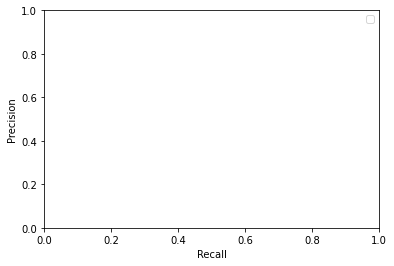

In [78]:
import numpy as np
import matplotlib.pyplot as plt

recall_1 = [1/729, 2/729, 3/729, 4/729, 5/729, 6/729, 7/729, 8/729, 9/729, 10/729]
precision_1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

recall_2 = [1/7, 2/7, 3/7, 4/7, 5/7, 6/7, 7/7]
precision_2 = [1, 1, 1, 1, 1, 1, 1]

recall_3 = [1/2948, 2/2948, 3/2948, 4/2948, 5/2948, 6/2948, 7/2948, 8/2948, 9/2948, 10/2948]
precision_3 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

recall_4 = [1/2870, 2/2870,3/2870,4/2870,5/2870,6/2870,7/2870,8/2870,9/2870,10/2870]
precision_4 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

fig, ax = plt.subplots()

ax.set(xlabel='Recall', ylabel='Precision')

plt.legend(loc='lower right')
ax.legend(['a', 'b','c','d'])

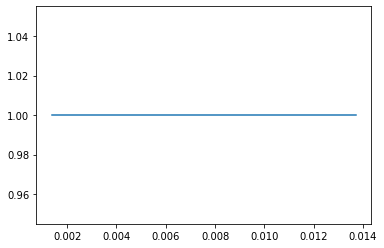

In [79]:
plt.plot(recall_1, precision_1)

Graph for a, makes sense as precision is always 1 and the recall slowly gets better as the first 10 are returned. Goes from 1/729 to 10/729 relevant results.

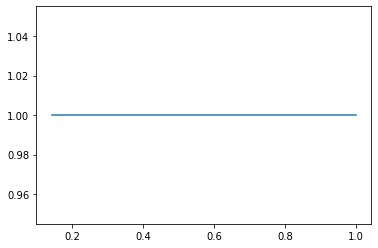

In [80]:
plt.plot(recall_2, precision_2)

Graph for b, makes sense as precision is always 1 and the recall quickly gets better as the first 7 are returned as there are only 7 relevant results. Goes from 1/7 to 7/7

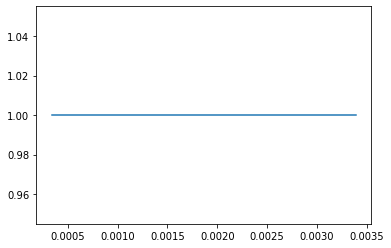

In [81]:
plt.plot(recall_3, precision_3)

Graph for c, makes sense as precision is always 1 and the recall slowly gets better as the first 10 are returned. Goes from 1/2948 relevant results to 10/2948 relevant results.

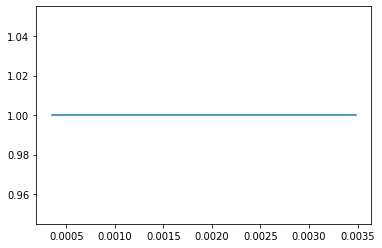

In [82]:
plt.plot(recall_4, precision_4)

Graph for d, makes sense as precision is always 1 and the recall slowly gets better as the first 10 are returned. Goes from 1/2870 to 2870 relevant results.